<a href="https://colab.research.google.com/github/Koallla/Data-Science/blob/hw2/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')
df.head()
df.shape
# df[df['Year'] == 2019].sort_values(by=['User Rating'], ascending=False)

О скольки книгах хранит данные датасет? 550 книг

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.isna().sum()

Есть ли в каких либо переменных пропуски? Нет

In [ ]:
df.genre.unique()

Какие есть уникальные жанры? 'Non Fiction', 'Fiction'

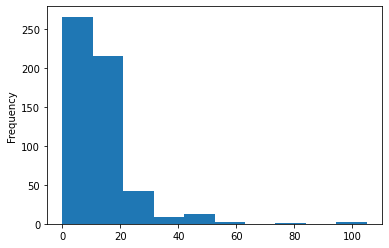

In [20]:
df.price.plot(kind='hist')

In [25]:
df.price.max()
df.price.min()
df.price.mean()
df.price.median()

13.1

Mаксимальная цена? 105
Минимальная цена? 0
Средняя цена? 13.1
Медианная цена? 11.0

In [98]:
# max_rating = df.user_rating.max()
# (df['user_rating'] == max_rating).sum()
# max_reviews = df.reviews.max()
# df[df['reviews'] == max_reviews].name
max_price_2015 = df[df.year == 2015].price.max()
index = df[df.year == 2015].price.sort_values()[-1:].index
df.iloc[index]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Какой рейтинг в датасете наивысший? Ответ: 4.9
Сколько книг имеют такой рейтинг? Ответ: 52
У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing
Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic...  
Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ:
Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ:
Какая книга последняя в отсортированном списке? Ответ: